In [1]:
import lightgbm as lgb

In [2]:
import pandas as pd

In [73]:
import numpy as np
import random

In [74]:
np.random.seed(42)
random.seed(42)

In [64]:
def read_merge_data(data_type="training"):
    #
    Dfs = []
    for name in ["mslp", "sst", "ssta", "t2m"]:
        df = pd.read_csv(f"./data_phase_one/{data_type}_input_{name}.csv")
        Dfs.append(df.T.reset_index(drop=True))
    Dfs = pd.concat(Dfs, axis=1)
    #Dfs.index = [f"col_{i}" for i in range(848)]
    return Dfs

In [65]:
train_df = read_merge_data()

In [72]:
train_df.shape

(5774, 3392)

In [81]:
target = pd.read_csv("./data_phase_one/training_output.csv").T

In [75]:
rand_indx = list(range(len(train_df)))
random.shuffle(rand_indx)

In [77]:
rand_indx = np.array(rand_indx)

In [25]:
from sklearn.model_selection import train_test_split

In [88]:
X_train = train_df.iloc[rand_indx[:3500]].values
X_val = train_df.iloc[rand_indx[3500:]].values

y_train = target.iloc[rand_indx[:3500]].values
y_val = target.iloc[rand_indx[3500:]].values

In [92]:
params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "custom",
    "max_depth": 8,
    'num_leaves': 255,
    "learning_rate": 0.001,
    "n_estimators": 1000,
    #"colsample_bytree": 0.8, 
    #"colsample_bynode": 0.8,
    "verbose": 10,
    "device": "cpu"
}

model = lgb.LGBMRegressor(**params, random_state=42)
model.fit(
    X_train, y_train[:,0],
    eval_set=[(X_val, y_val[:,0])])

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000012
[LightGBM] [Debug] init for col-wise cost 0.000040 seconds, init for row-wise cost 0.025168 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.132345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 864960
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 3392
[LightGBM] [Info] Start training from score -0.053039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 137 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 137 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 137 and depth = 8
[LightGBM] [Warning] No further splits with positive g

LGBMRegressor(device='cpu', learning_rate=0.001, max_depth=8, metric='custom',
              n_estimators=1000, num_leaves=255, objective='regression',
              random_state=42, verbose=10)

In [93]:
model

LGBMRegressor(device='cpu', learning_rate=0.001, max_depth=8, metric='custom',
              n_estimators=1000, num_leaves=255, objective='regression',
              random_state=42, verbose=10)

In [95]:
pred_10 = model.predict(X_val[:10])

In [98]:
np.linalg.norm(y_val[:10, 0]-pred_10)

0.9624536393472777

In [99]:
import matplotlib.pyplot as plt

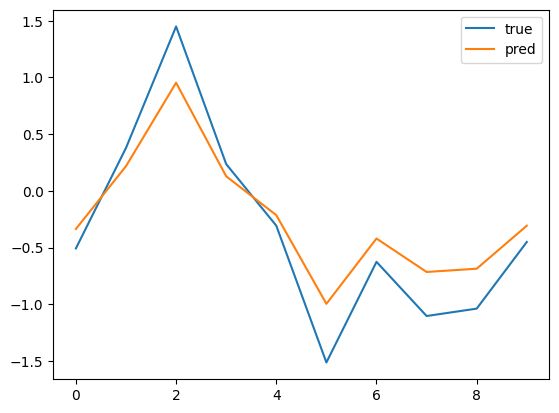

In [101]:
plt.plot(y_val[:10, 0])
plt.plot(pred_10)
plt.legend(["true", "pred"])
plt.show()